#EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

#load training dataset
df_train = pd.read_csv('option_train.csv')
df_train.head()

Saving option_train.csv to option_train.csv


,Unnamed: 0,Value,S,K,tau,r,BS
0,1,348.500,1394.46,1050,0.128767,0.0116,Under
1,2,149.375,1432.25,1400,0.679452,0.0113,Under
2,3,294.500,1478.90,1225,0.443836,0.0112,Under
3,4,3.375,1369.89,1500,0.117808,0.0119,Over
4,5,84.000,1366.42,1350,0.298630,0.0119,Under


In [ ]:
#dropping the first column
df_train = df_train.drop(['Unnamed: 0'], axis = 1)

#check for nulls
df_train.isnull().sum()

Value    0
S        0
K        0
tau      0
r        0
BS       0
dtype: int64

In [ ]:
#check for zero or negative values
print(df_train.describe())

             Value            S            K          tau            r
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean    140.316869  1426.643916  1370.244000     0.327615     0.011468
std     125.155000    56.051523   172.679107     0.231184     0.000448
min       0.281250  1264.740000   750.000000     0.084932     0.010600
25%      45.750000  1387.670000  1275.000000     0.142466     0.011100
50%     105.125000  1434.320000  1400.000000     0.238356     0.011400
75%     200.406250  1469.440000  1475.000000     0.463014     0.011700
max     685.500000  1527.460000  1995.000000     0.989041     0.012900


In [ ]:
#check for BS count
df_train.BS.value_counts()

BS
Under    3868
Over     1132
Name: count, dtype: int64

In [ ]:
#encode under as 0 and over as 1 in the BS column
mapping = {'Under': 0, 'Over': 1}
df_train['BSE'] = df_train['BS'].map(mapping)
print(df_train)

        Value        S     K       tau       r     BS  BSE
0     348.500  1394.46  1050  0.128767  0.0116  Under    0
1     149.375  1432.25  1400  0.679452  0.0113  Under    0
2     294.500  1478.90  1225  0.443836  0.0112  Under    0
3       3.375  1369.89  1500  0.117808  0.0119   Over    1
4      84.000  1366.42  1350  0.298630  0.0119  Under    0
...       ...      ...   ...       ...     ...    ...  ...
4995  325.250  1465.15  1175  0.424658  0.0111  Under    0
4996   36.000  1480.87  1480  0.101370  0.0111   Over    1
4997   90.000  1356.56  1500  0.673973  0.0120  Under    0
4998  175.875  1333.36  1200  0.309589  0.0122  Under    0
4999  106.375  1480.87  1475  0.504110  0.0111  Under    0

[5000 rows x 7 columns]


In [ ]:
#normalize training features data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_features = ['S', 'K', 'tau', 'r']

df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

print(df_train)

        Value         S         K       tau         r     BS  BSE
0     348.500  0.493758  0.240964  0.048485  0.434783  Under    0
1     149.375  0.637599  0.522088  0.657576  0.304348  Under    0
2     294.500  0.815164  0.381526  0.396970  0.260870  Under    0
3       3.375  0.400236  0.602410  0.036364  0.565217   Over    1
4      84.000  0.387028  0.481928  0.236364  0.565217  Under    0
...       ...       ...       ...       ...       ...    ...  ...
4995  325.250  0.762827  0.341365  0.375758  0.217391  Under    0
4996   36.000  0.822663  0.586345  0.018182  0.217391   Over    1
4997   90.000  0.349498  0.602410  0.651515  0.608696  Under    0
4998  175.875  0.261191  0.361446  0.248485  0.695652  Under    0
4999  106.375  0.822663  0.582329  0.463636  0.217391  Under    0

[5000 rows x 7 columns]


In [ ]:
#training and features for regression
X_train = df_train.drop(columns = ['Value', 'BS', 'BSE']) #dropping value, bs, and bse columns
y_train = df_train['Value'] #all rows column 1
training = df_train.drop(columns = ['BSE', 'BS']) #dropping columns bs and bse
print("Features: ")
print(X_train)
print()
print("Target: ")
print(y_train)

Features: 
             S         K       tau         r
0     0.493758  0.240964  0.048485  0.434783
1     0.637599  0.522088  0.657576  0.304348
2     0.815164  0.381526  0.396970  0.260870
3     0.400236  0.602410  0.036364  0.565217
4     0.387028  0.481928  0.236364  0.565217
...        ...       ...       ...       ...
4995  0.762827  0.341365  0.375758  0.217391
4996  0.822663  0.586345  0.018182  0.217391
4997  0.349498  0.602410  0.651515  0.608696
4998  0.261191  0.361446  0.248485  0.695652
4999  0.822663  0.582329  0.463636  0.217391

[5000 rows x 4 columns]

Target: 
0       348.500
1       149.375
2       294.500
3         3.375
4        84.000
         ...   
4995    325.250
4996     36.000
4997     90.000
4998    175.875
4999    106.375
Name: Value, Length: 5000, dtype: float64


#REGRESSION MODELS:

##Linear Regression

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

#setup ols
ols_model = LinearRegression()

#setup k-fold cross-validation with k = 10 and compute mse
folds = 10
k_fold = KFold(n_splits = folds, random_state = 42, shuffle = True)
cv_score_ols_r2 = cross_val_score(ols_model, X_train, y_train, cv = k_fold, scoring = 'r2')
cv_score_ols_mse = cross_val_score(ols_model, X_train, y_train, cv = k_fold, scoring = 'neg_mean_squared_error')

#print the mean cv rmse score
print("Mean CV MSE score for OLS:", round(-cv_score_ols_mse.mean(), 6))
print()
#print the mean cv r2 score
print("Mean CV R-squared score for OLS:", round(cv_score_ols_r2.mean(), 6))

Mean CV MSE score for OLS: 1178.304931

Mean CV R-squared score for OLS: 0.924414


## K Means Clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best number of clusters: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


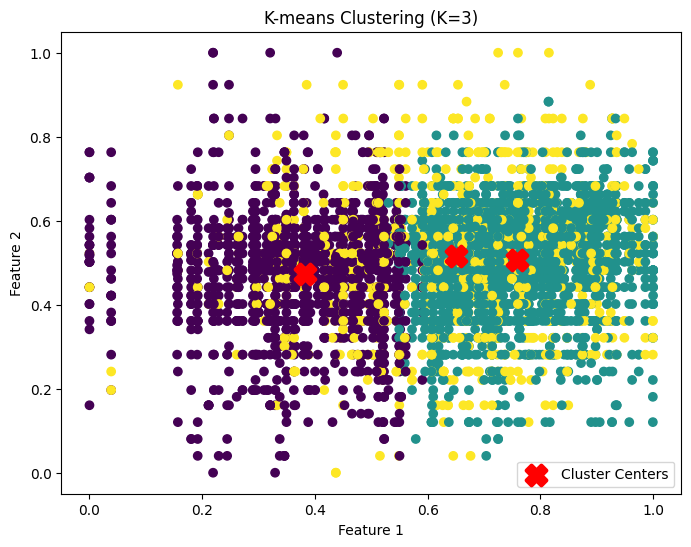

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train is your training feature DataFrame
max_clusters = 5

# Function to perform clustering and return silhouette score
def perform_clustering(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    return silhouette_avg

# Perform clustering for different values of K and store silhouette scores
silhouette_scores = pd.DataFrame({'K': range(2, max_clusters+1)})
silhouette_scores['Silhouette Score'] = silhouette_scores['K'].apply(perform_clustering)

# Find the best number of clusters based on silhouette score
best_k = silhouette_scores.loc[silhouette_scores['Silhouette Score'].idxmax(), 'K']
print(f"Best number of clusters: {best_k}")

# Perform clustering with the best K value
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# Visualize the clusters (assuming 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, linewidths=3,
            color='red', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering (K={best_k})')
plt.legend()
plt.show()

##KNN - K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#we need to find an optimal value of k for knn
#define a range of k values to try
k_values = [1, 3, 5, 7, 9]

#dictionary to store mean scores for each k value, k value = key, mean score = value
knn_mean_scores = {}

#loop over each k value
for k in k_values:
    #create knn model to loop
    knn_reg = KNeighborsRegressor(n_neighbors=k)

    #perform cv score loop
    folds = 10
    k_fold = KFold(n_splits = folds, random_state = 42, shuffle = True)

    #take the mean of the mse score for that k and put taht into knn_mean_scores dictionary
    knn_mean_scores[k] = -cross_val_score(knn_reg, X_train, y_train, cv = k_fold, scoring = 'neg_mean_squared_error').mean()

#loop dictionary to print
for k, mse in knn_mean_scores.items():
    print("For k =", k, ", Mean Squared Error (MSE):", round(mse, 6))


For k = 1 , Mean Squared Error (MSE): 299.427719
For k = 3 , Mean Squared Error (MSE): 246.229558
For k = 5 , Mean Squared Error (MSE): 255.42395
For k = 7 , Mean Squared Error (MSE): 275.004414
For k = 9 , Mean Squared Error (MSE): 287.492181


From the loop, we can see that the minimal mse obtained from knn from k = 1, 3, 5, 7, 9, the optimal k value is k = 3

In [ ]:
#use the optimal k value to find the cv R-squared score associated with that model
optimal_k = 3
knn_model = KNeighborsRegressor(n_neighbors = optimal_k).fit(X_train, y_train)
cv_score_knn_r2 = cross_val_score(knn_model, X_train, y_train, cv = k_fold, scoring = 'r2')
print("Mean CV R-squared score for KNN:", round(cv_score_knn_r2.mean(), 6))
print()
print("Mean CV RMSE score for KNN (k = 3):", round(knn_mean_scores[3], 6))

Mean CV R-squared score for KNN: 0.984249

Mean CV RMSE score for KNN (k = 3): 246.229558


##Decision Tree

In [ ]:
#setup decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#define the parameter grid with different values for max_depth
param_dt = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

#setup decision tree model
dt_model = DecisionTreeRegressor()

#perform grid search with cv to find the best max depth parameter using mse as metric and n_jobs -1 for parallel processing
gs_dt_mse = GridSearchCV(dt_model, param_dt, cv = k_fold, scoring = 'neg_mean_squared_error', n_jobs = -1)
gs_dt_mse.fit(X_train, y_train)

print("Best parameters:", gs_dt_mse.best_params_)
print("Best mean squared error:", round(-gs_dt_mse.best_score_, 6))
print()

#perform grid search with cv to find the best max depth parameter using r-squared as metric and n_jobs -1 for parallel processing
gs_dt_r2 = GridSearchCV(dt_model, param_dt, cv = k_fold, scoring = 'r2', n_jobs = -1)
gs_dt_r2.fit(X_train, y_train)
print("Best parameters:", gs_dt_r2.best_params_)
print("Best R-squared:", round(gs_dt_r2.best_score_, 6))

Best parameters: {'max_depth': 10}
Best mean squared error: 136.919839

Best parameters: {'max_depth': 10}
Best R-squared: 0.991084


##Random Forest

In [ ]:
#setup random forest for baseline MSE to compare if overfitting
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

cv_score_rf_mse = cross_val_score(rf_model, X_train, y_train, cv = k_fold, scoring = 'neg_mean_squared_error')
cv_score_rf_r2 = cross_val_score(rf_model, X_train, y_train, cv = k_fold, scoring = 'r2')
print("Mean CV MSE score for Random Forest:", round(-cv_score_rf_mse.mean(), 6))
print()
print("Mean CV R-squared score for Random Forest:", round(cv_score_rf_r2.mean(), 6))

Mean CV MSE score for Random Forest: 50.683103

Mean CV R-squared score for Random Forest: 0.996715


In [ ]:
#perform a gridsearch to find the optimal mse with the best parameters
#this will take about 25 minutes to run
#define the parameter grid with different values for hyperparameters
param_rf = {
    'n_estimators': [100, 200, 300],  #number of trees in the forest
    'max_depth': [3, 5, 7, 9, 20],   #max depth of the trees aka the # of splits each decision tree is allowed to make
    'min_samples_split': [2, 5, 10],   #min observations need to split a node
    'min_samples_leaf': [1, 2, 4]}      #min observations need to be at a leaf node

#setup random forest model
rf_model = RandomForestRegressor()

#perform grid search with cv using mse as metric and njobs -1 to parallel process
gs_rf_mse = GridSearchCV(rf_model, param_rf, cv = k_fold, scoring = 'neg_mean_squared_error', n_jobs = -1)
gs_rf_mse.fit(X_train, y_train)

#print the best parameters and best mean squared error
print("Best parameters:", gs_rf_mse.best_params_)
print("Best mean squared error:", round(-gs_rf_mse.best_score_, 6))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best mean squared error: 50.505522


In [ ]:
#using the parameters found in the best mean squared error
rf_model_best_param = RandomForestRegressor(n_estimators = 300, max_depth = 20, min_samples_split = 2, min_samples_leaf = 1)

#perform cross-validation
cv_score_rf = cross_val_score(rf_model_best_param, X_train, y_train, cv = k_fold, scoring = 'r2', n_jobs = -1)

#print the mean R-squared score
print("Mean CV R-squared score for Random Forest:", round(cv_score_rf.mean(), 6))

Mean CV R-squared score for Random Forest: 0.996739


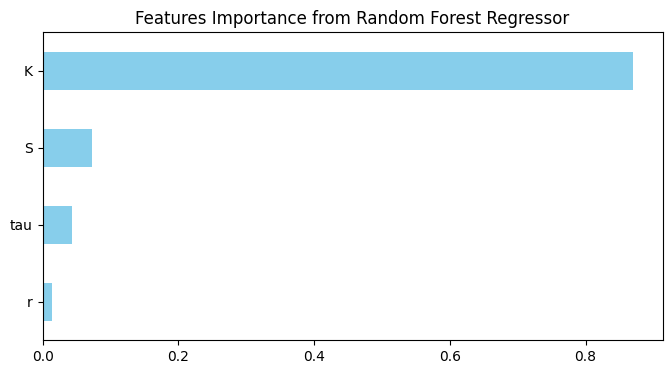

In [ ]:
import matplotlib.pyplot as plt

#fit best model on entire training data to obtain feature importances
rf_reg = rf_model_best_param.fit(X_train, y_train)
rf_feat_importances = rf_reg.feature_importances_

#create a pandas series to map feature importances to their corresponding feature names
importances = pd.Series(rf_feat_importances, index = ['S', 'K', 'tau', 'r'])

#sort the features by importance
sorted_importances = importances.sort_values()

#plotting
plt.figure(figsize=(8,4))
sorted_importances.plot(kind='barh', color='skyblue')
plt.title('Features Importance from Random Forest Regressor')
plt.show()

##Ridge and Lasso Regression

###Ridge:

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

#alpha scale
alphas = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas = alphas, scoring = 'r2', cv = k_fold)
ridgecv.fit(X_train, y_train)
optimal_ridge_alpha = ridgecv.alpha_
print('Optimal alpha value for Ridge regression:', round(optimal_ridge_alpha, 4))
print()

#use optimal alpha in ridge model to find cv r-squared and mse
ridge_model = Ridge(alpha = ridgecv.alpha_)

cv_score_ridge_mse = cross_val_score(ridge_model, X_train, y_train, cv = k_fold, scoring = 'neg_mean_squared_error')
cv_score_ridge_r2 = cross_val_score(ridge_model, X_train, y_train, cv = k_fold, scoring = 'r2')

print("Mean CV MSE score for Ridge:", round(-cv_score_ridge_mse.mean(), 6))
print()
print("Mean CV R-squared score for Ridge:", round(cv_score_ridge_r2.mean(), 6))


Optimal alpha value for Ridge regression: 0.0202

Mean CV MSE score for Ridge: 1178.302928

Mean CV R-squared score for Ridge: 0.924414


###Lasso:

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import make_scorer, r2_score #need for finding r2 with lasso regression

lassocv = LassoCV(alphas = alphas, cv = k_fold) #lassoCV only uses scoring = neg mean squared error
lassocv.fit(X_train, y_train)
optimal_lasso_alpha = lassocv.alpha_
print('Optimal alpha value for Lasso regression:', round(optimal_lasso_alpha, 4))
print()

#use optimal alpha in ridge model to find cv mse
lasso_model = Lasso(alpha = lassocv.alpha_)

cv_score_lasso_mse = cross_val_score(lasso_model, X_train, y_train, cv = k_fold, scoring = 'neg_mean_squared_error')

#because lasso doesn't have r2 we have to make it ourselves so we define a custom scorer for R2 score to put in cv scoring argumernt
r2_scorer = make_scorer(r2_score, greater_is_better = True)

#use r2_scorer as scoring argument in cv
cv_score_lasso_r2 = cross_val_score(lasso_model, X_train, y_train, cv = k_fold, scoring = r2_scorer)

#print mean cv mse and r2 score
print("Mean CV MSE score for Lasso:", round(-cv_score_lasso_mse.mean(), 6))
print()
print("Mean CV R-squared score for Lasso:", round(cv_score_lasso_r2.mean(), 6))

Optimal alpha value for Lasso regression: 0.0116

Mean CV MSE score for Lasso: 1178.245307

Mean CV R-squared score for Lasso: 0.924418


##SVM - Support Vector Machine

In [ ]:
from sklearn.svm import SVR

#takes 9 minutes to run
#set up SVM model
svm_model = SVR()

#set up parameters to check
param_svm = {
    'C': [0.1, 1, 10],         #budget for amount that margin can be violated
    'kernel': ['linear', 'poly', 'rbf'],  #kernel type
    'gamma': [0.1, 0.01, 0.001]}  #kernel coefficient for radial kernel

#grid search cv for mse
gs_svr_mse = GridSearchCV(svm_model, param_svm, cv = k_fold, scoring = 'neg_mean_squared_error', n_jobs = -1)
gs_svr_mse.fit(X_train, y_train)

#grid search cv for r-squared
gs_svr_r2 = GridSearchCV(svm_model, param_svm, cv = k_fold, scoring = 'r2', n_jobs = -1)
gs_svr_r2.fit(X_train, y_train)

print("Best parameters:", gs_svr_mse.best_params_)
print("Best MSE:", round(-gs_svr_mse.best_score_, 6))
print()
print("Best parameters:", gs_svr_r2.best_params_)
print("Best R-squared:", round(gs_svr_r2.best_score_, 6))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best MSE: 1316.661485

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best R-squared: 0.915584


#EVALUATION METRIC SUMMARY FOR REGRESSION TECHNIQUES:

In [ ]:
print('OLS:')
print("Best mean CV MSE score for OLS:", round(-cv_score_ols_mse.mean(), 6))
print("Best mean CV R-squared score for OLS:", round(cv_score_ols_r2.mean(), 6))
print()

print('KNN:')
print("Best mean CV MSE score for KNN (k = 3):", round(knn_mean_scores[3], 6))
print("Best mean CV R-squared score for KNN (k = 3):", round(cv_score_knn_r2.mean(), 6))
print()

print('Decision Tree:')
print("Best mean CV MSE score for Decision Tree", round(-gs_dt_mse.best_score_, 6))
print("Best mean CV R-squared score for Decision Tree:", round(gs_dt_r2.best_score_, 6))
print()

print('Random Forest:')
print("Best mean CV MSE score for Random Forest:", round(-gs_rf_mse.best_score_, 6))
print("Best mean CV R-squared score for Random Forest:", round(cv_score_rf.mean(), 6))
print()

print('Ridge Regression:')
print('Best mean CV MSE score for Ridge at alpha = 0.0202:', round(-cv_score_ridge_mse.mean(), 6))
print('Best mean CV R-squared score for Ridge at alpha = 0.0202:', round(cv_score_ridge_r2.mean(), 6))
print()

print('Lasso')
print('Best mean CV MSE score for Lasso at alpha = 0.0116:', round(-cv_score_lasso_mse.mean(), 6))
print('Best mean CV R-squared score for Lasso at alpha = 0.0116:', round(cv_score_lasso_r2.mean(), 6))
print()

print('Support Vector Machine:')
print("Best mean CV MSE score for SVM:", round(-gs_svr_mse.best_score_, 6))
print("Best mean CV R-squared score for SVM:", round(gs_svr_r2.best_score_, 6))

OLS:
Best mean CV MSE score for OLS: 1178.304931
Best mean CV R-squared score for OLS: 0.924414

KNN:
Best mean CV MSE score for KNN (k = 3): 246.229558
Best mean CV R-squared score for KNN (k = 3): 0.984249

Decision Tree:
Best mean CV MSE score for Decision Tree 139.223729
Best mean CV R-squared score for Decision Tree: 0.991017

Random Forest:
Best mean CV MSE score for Random Forest: 50.505522
Best mean CV R-squared score for Random Forest: 0.996751

Ridge Regression:
Best mean CV MSE score for Ridge at alpha = 0.0202: 1178.302928
Best mean CV R-squared score for Ridge at alpha = 0.0202: 0.924414

Lasso
Best mean CV MSE score for Lasso at alpha = 0.0116: 1178.245307
Best mean CV R-squared score for Lasso at alpha = 0.0116: 0.924418

Support Vector Machine:
Best mean CV MSE score for SVM: 1316.661485
Best mean CV R-squared score for SVM: 0.915584


#CLASSFICATION MODELS:

In [ ]:
#set up data to train classificaiton models

X_clf_train = df_train.drop(['BS', 'BSE'], axis = 1)
y_clf_train = df_train['BSE']

print('Classification Training Features:')
print()
print(X_clf_train)
print()
print('Classification Training Target:')
print()
print(y_clf_train)

Classification Training Features:

        Value         S         K       tau         r
0     348.500  0.493758  0.240964  0.048485  0.434783
1     149.375  0.637599  0.522088  0.657576  0.304348
2     294.500  0.815164  0.381526  0.396970  0.260870
3       3.375  0.400236  0.602410  0.036364  0.565217
4      84.000  0.387028  0.481928  0.236364  0.565217
...       ...       ...       ...       ...       ...
4995  325.250  0.762827  0.341365  0.375758  0.217391
4996   36.000  0.822663  0.586345  0.018182  0.217391
4997   90.000  0.349498  0.602410  0.651515  0.608696
4998  175.875  0.261191  0.361446  0.248485  0.695652
4999  106.375  0.822663  0.582329  0.463636  0.217391

[5000 rows x 5 columns]

Classification Training Target:

0       0
1       0
2       0
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: BSE, Length: 5000, dtype: int64


##Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#set up stratified kfold
folds_clf = 10
skf = StratifiedKFold(n_splits = folds_clf, random_state = 42, shuffle = True)

#set up logit model
logit_model = LogisticRegression(max_iter = 1_000)

cv_score_logit_acc = cross_val_score(logit_model, X_train, y_clf_train, cv = skf, scoring = 'accuracy')

print('Mean CV accuracy score for Logit:', round(cv_score_logit_acc.mean(), 4))

Mean CV accuracy score for Logit: 0.8794


##LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#initialize and train the Linear Discriminant Analysis Classifier
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_clf_train)

cv_score_lda_acc = cross_val_score(lda_classifier, X_train, y_clf_train, cv = skf, scoring = 'accuracy')

print('Mean CV accuracy score for LDA:', round(cv_score_lda_acc.mean(), 6))
print()

#predict on the validation set to get a confusion matrix
y_pred_lda = lda_classifier.predict(X_train)

#confusion matrix
conf_matrix_lda = confusion_matrix(y_clf_train, y_pred_lda)
print('Confusion Matrix:\n', conf_matrix_lda)
print()

report_lda = classification_report(y_clf_train, y_pred_lda)
print('Classification Report:\n', report_lda)


Mean CV accuracy score for LDA: 0.8692

Confusion Matrix:
 [[3764  104]
 [ 551  581]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      3868
           1       0.85      0.51      0.64      1132

    accuracy                           0.87      5000
   macro avg       0.86      0.74      0.78      5000
weighted avg       0.87      0.87      0.86      5000



##KNN - K Nearest Neighbor - Classification:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#define parameters
param_knn_clf = {'n_neighbors': [3, 5, 7, 9]}  #k neighbors

#setup KNN clf model
knn_clf_model = KNeighborsClassifier()

#grid search with cv
gs_knn_clf = GridSearchCV(knn_clf_model, param_knn_clf, cv = skf, scoring = 'accuracy', n_jobs = -1)
gs_knn_clf.fit(X_train, y_clf_train)

print('KNN best parameter: ', gs_knn_clf.best_params_)
print('KNN best mean accuracy: ', round(gs_knn_clf.best_score_, 4))

KNN best parameter:  {'n_neighbors': 3}
KNN best mean accuracy:  0.9158


##Decision Tree - Classification:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#define parameters
param_dt_clf = {
    'max_depth': [None, 10, 20, 30],  #max depth of the tree
    'min_samples_split': [2, 5, 10],  #min samples need to split a node
    'min_samples_leaf': [1, 2, 4]}  #min samples need at each leaf node

#set up decision tree model for clf
dt_clf_model = DecisionTreeClassifier()

#grid search with cv
gs_dt_clf = GridSearchCV(dt_clf_model, param_dt_clf, cv = skf, scoring = 'accuracy', n_jobs = -1)
gs_dt_clf.fit(X_train, y_clf_train)

print("Decision Tree best parameters:", gs_dt_clf.best_params_)
print("Decision Tree best mean accuracy:", round(gs_dt_clf.best_score_, 4))

Decision Tree best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree best mean accuracy: 0.9152


##Random Forest - Classification:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#set up random foreset model for clf
rf_clf_model = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_split = 2, min_samples_leaf = 1)

#cv using same optimal parameters as in regression for random forest
cv_rf_clf = cross_val_score(rf_clf_model, X_train, y_clf_train, cv = skf, scoring = 'accuracy')

print("Random Forest best mean accuracy:", round(cv_rf_clf.mean(), 4))

Random Forest best mean accuracy: 0.9352


##SVM - Support Vector Maching - Classification:

In [ ]:
from sklearn.svm import SVC

#setup SVM model
svm_clf_model = SVC(C = 10, gamma = 0.1, kernel = 'linear')

#cv using same optimal parameters as svm regression
cv_svm_clf = cross_val_score(svm_clf_model, X_train, y_clf_train, cv = skf, scoring = 'accuracy')

print("SVM best mean accuracy:", round(cv_svm_clf.mean(), 4))

SVM best mean accuracy: 0.8926


#EVALUATION METRIC SUMMARY FOR CLASSIFICATION TECHNIQUES:

In [ ]:
print('Best mean CV accuracy score for Logit:', round(cv_score_logit_acc.mean(), 4))
print('Best mean CV accuracy score for LDA:', round(cv_score_lda_acc.mean(), 4))
print('Best mean CV accuracy score for KNN: ', round(gs_knn_clf.best_score_, 4))
print("Best mean CV accuracy score for Decision Tree:", round(gs_dt_clf.best_score_, 4))
print("Best mean CV accuracy score for Random Forest:", round(cv_rf_clf.mean(), 4))
print("Best mean CV accuracy score for SVM:", round(cv_svm_clf.mean(), 4))

Best mean CV accuracy score for Logit: 0.8794
Best mean CV accuracy score for LDA: 0.8692
Best mean CV accuracy score for KNN:  0.9158
Best mean CV accuracy score for Decision Tree: 0.9152
Best mean CV accuracy score for Random Forest: 0.9352
Best mean CV accuracy score for SVM: 0.8926


In [ ]:
#ROC-AUC for best model

cv_rf_roc_auc = cross_val_score(rf_clf_model, X_train, y_clf_train,
                                cv = skf, scoring = 'roc_auc')

print("Mean ROC AUC for Random Forest:", np.mean(cv_rf_roc_auc))

Mean ROC AUC for Random Forest: 0.973565356619061


#Test Data Prediction

##EDA & Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving option_test_nolabel.csv to option_test_nolabel (1).csv


In [ ]:
#load training dataset
df_test = pd.read_csv('option_test_nolabel.csv')
df_test.head()

,Unnamed: 0,S,K,tau,r
0,1,1409.28,1325,0.126027,0.0115
1,2,1505.97,1100,0.315068,0.0110
2,3,1409.57,1450,0.197260,0.0116
3,4,1407.81,1250,0.101370,0.0116
4,5,1494.50,1300,0.194521,0.0110


In [ ]:
#drop the first column
df_test = df_test.drop(['Unnamed: 0'], axis = 1)
print(df_test)

           S     K       tau       r
0    1409.28  1325  0.126027  0.0115
1    1505.97  1100  0.315068  0.0110
2    1409.57  1450  0.197260  0.0116
3    1407.81  1250  0.101370  0.0116
4    1494.50  1300  0.194521  0.0110
..       ...   ...       ...     ...
495  1514.09  1200  0.301370  0.0109
496  1359.15  1500  0.260274  0.0119
497  1396.93  1410  0.156164  0.0117
498  1436.51  1475  0.463014  0.0114
499  1264.74  1100  0.238356  0.0129

[500 rows x 4 columns]


In [ ]:
#check for nulls
df_test.isnull().sum()

S      0
K      0
tau    0
r      0
dtype: int64

In [ ]:
#check for zero or negative values
print(df_test.describe())

                 S            K         tau           r
count   500.000000   500.000000  500.000000  500.000000
mean   1425.534580  1360.390000    0.316022    0.011476
std      55.269994   167.710021    0.221916    0.000445
min    1264.740000   850.000000    0.084932    0.010600
25%    1386.170000  1250.000000    0.141781    0.011100
50%    1432.220000  1375.000000    0.235616    0.011400
75%    1467.285000  1470.000000    0.437671    0.011800
max    1527.460000  1995.000000    0.986301    0.012900


In [ ]:
#normalize training features data
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

print(df_test)

            S         K       tau         r
0    0.550167  0.461847  0.045455  0.391304
1    0.918202  0.281124  0.254545  0.173913
2    0.551271  0.562249  0.124242  0.434783
3    0.544572  0.401606  0.018182  0.434783
4    0.874543  0.441767  0.121212  0.173913
..        ...       ...       ...       ...
495  0.949109  0.361446  0.239394  0.130435
496  0.359356  0.602410  0.193939  0.565217
497  0.503159  0.530120  0.078788  0.478261
498  0.653814  0.582329  0.418182  0.347826
499  0.000000  0.281124  0.169697  1.000000

[500 rows x 4 columns]


In [ ]:
#predict values and class label

#regression values
rf_reg_best = rf_model_best_param
values = rf_reg_best.predict(df_test)
print('First 10 Values:')
print()
print(values[:10])
print()

#class labels
rf_clf_best = rf_clf_model.fit(X_train, y_clf_train)
BS = rf_clf_best.predict(df_test)
print('First 10 Labels:')
print()
print(BS[:10])

First 10 Values:

[112.89666667 427.72166667  42.77208333 182.10958333 220.01166667
 267.36625     42.99208333 254.65166667 284.14541667  99.35083333]

First 10 Labels:

[0 0 0 0 0 0 1 0 0 0]


In [ ]:
combine = list(zip(values, BS))
output = pd.DataFrame(combine, columns=['Value', 'BS'])
output.to_csv('group_9_prediction.csv', index=False)
output_csv_path = 'group_9_prediction.csv'
output_df = pd.read_csv(output_csv_path)
print(output_df)

          Value  BS
0    112.896667   0
1    427.721667   0
2     42.772083   0
3    182.109583   0
4    220.011667   0
..          ...  ..
495  329.392083   0
496   18.780000   1
497   40.776250   0
498   77.951667   0
499  227.239167   0

[500 rows x 2 columns]


In [ ]:
output.BS.value_counts()

BS
0    393
1    107
Name: count, dtype: int64